<a href="https://colab.research.google.com/github/linndemberg1/Computer-vision/blob/main/Trab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

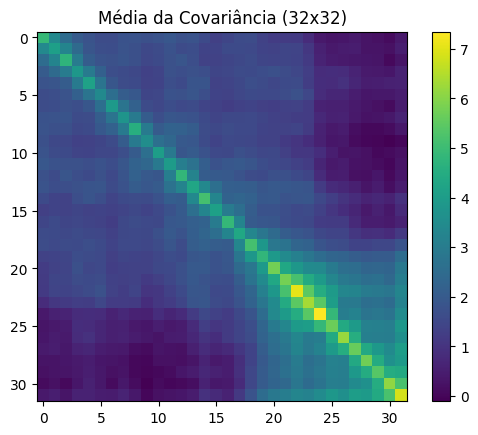

In [1]:
import cv2  # Importa a biblioteca OpenCV para processamento de imagens
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays e cálculos matemáticos
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para visualização de dados
import glob  # Importa a biblioteca glob para localizar arquivos no sistema de arquivos

# Função para calcular a covariância de uma imagem
def calcular_covariancia(imagem):
    # Converter a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)  # Converte a imagem de BGR (cor) para grayscale (escala de cinza)

    # Selecionar a região de 32x32 pixels no centro da imagem
    centro_x = imagem_cinza.shape[1] // 2  # Calcula a coordenada x do centro da imagem
    centro_y = imagem_cinza.shape[0] // 2  # Calcula a coordenada y do centro da imagem
    regiao = imagem_cinza[centro_y - 16 : centro_y + 16, centro_x - 16 : centro_x + 16]  # Extrai uma região de 32x32 pixels ao redor do centro

    # Calcular a covariância da região
    cov = np.cov(regiao)  # Calcula a matriz de covariância da região selecionada

    return cov  # Retorna a matriz de covariância

covariancias = []  # Lista para armazenar as covariâncias de cada imagem

imagens = []  # Lista para armazenar as imagens carregadas
img = glob.glob('/content/sample_data/zed/*.png')  # Localiza todos os arquivos PNG na pasta especificada
img = img[:25]  # Limita a seleção para as 25 primeiras imagens encontradas

# Carrega cada imagem e armazena na lista 'imagens'
for image_path in img:
    imagem = cv2.imread(image_path)  # Carrega a imagem usando OpenCV
    imagens.append(imagem)  # Adiciona a imagem carregada à lista

# Calcula a covariância para cada imagem e armazena na lista 'covariancias'
for imagem in imagens:
    cov = calcular_covariancia(imagem)  # Calcula a covariância da região central da imagem
    covariancias.append(cov)  # Adiciona a covariância calculada à lista

# Calcula a média das covariâncias de todas as imagens
media_covariancia = np.mean(covariancias, axis=0)

# Exibe a média da matriz de covariância como uma imagem
plt.imshow(media_covariancia, cmap='viridis', interpolation='nearest')  # Plota a matriz de covariância média com um mapa de cores
plt.title('Média da Covariância (32x32)')  # Define o título do gráfico
plt.colorbar()  # Adiciona uma barra de cores para indicar a escala
plt.show()  # Exibe o gráfico
